<a href="https://colab.research.google.com/github/andresvivancov/PIMA-Indian-Diabetes-Prediction-by-AV/blob/master/PIMA_Indian_Diabetes_Prediction_by_AV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PIMA-Indian-Diabetes-Prediction-by-AV

## 0. Info

From https://github.com/andresvivancov/PIMA-Indian-Diabetes-Prediction-by-AV


Data Sources https://github.com/andresvivancov/

PIMA-Indian-Diabetes-Prediction-by-AV/tree/master/data


Andres Vivanco 


June 2020

## 1. Data Collection & Integration

In [0]:
# Originally from UCI Machine Learning Repository
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
df = pd.read_csv ('https://raw.githubusercontent.com/andresvivancov/PIMA-Indian-Diabetes-Prediction-by-AV/master/data/pima-data.csv')

## 2. Data Preparation

In [3]:
df.head(3)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True


In [4]:
df.describe

<bound method NDFrame.describe of      num_preg  glucose_conc  diastolic_bp  ...  age    skin  diabetes
0           6           148            72  ...   50  1.3790      True
1           1            85            66  ...   31  1.1426     False
2           8           183            64  ...   32  0.0000      True
3           1            89            66  ...   21  0.9062     False
4           0           137            40  ...   33  1.3790      True
..        ...           ...           ...  ...  ...     ...       ...
763        10           101            76  ...   63  1.8912     False
764         2           122            70  ...   27  1.0638     False
765         5           121            72  ...   30  0.9062     False
766         1           126            60  ...   47  0.0000      True
767         1            93            70  ...   23  1.2214     False

[768 rows x 10 columns]>

In [5]:
df.shape

(768, 10)

In [6]:
df.tail(4)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


Checking null values in df

In [7]:
df.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

In [8]:
df.isnull().values.any()

False

###Checking correlation

In [9]:
df.corr(method= 'pearson')

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [10]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


## 3. Data Visualization & Analysis

In [0]:
def plot_correlation (df, size =11):
  corr= df.corr()
  fig, ax = plt.subplots (figsize=(size, size))
  ax.matshow(corr)
  plt.xticks (range(len(corr.columns)), corr.columns)
  plt.yticks (range(len(corr.columns)), corr.columns)

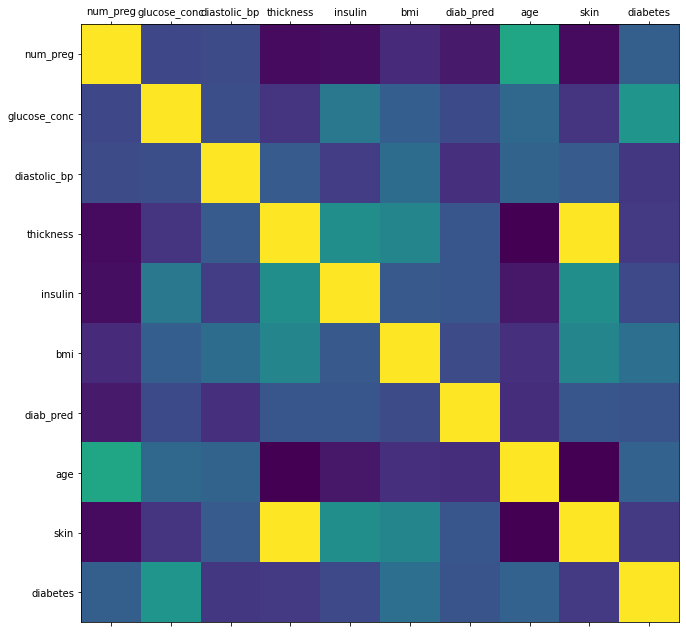

In [12]:
plot_correlation (df)

## 4. Feauture Selection & Engineering

In [0]:
del df['skin']

In [14]:
df.head(4)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False


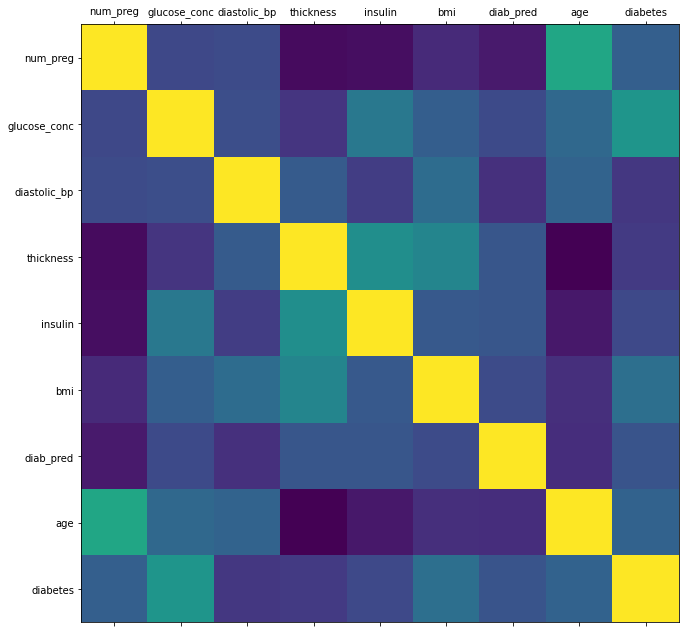

In [15]:
plot_correlation (df)

In [16]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [0]:
#Change True to 1 and False to 0
diabetes_map = {True: 1, False: 0}

In [0]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [19]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
num_true = len(df.loc[df['diabetes'] == True ])
num_false = len (df.loc[df['diabetes'] == False])

In [21]:
#True Cases
print('Number of True Cases in the dataset: {0} ({1:2.2f}%)'.format(num_true, (num_true/(num_true + num_false)) * 100  ))

Number of True Cases in the dataset: 268 (34.90%)


In [22]:
#False Cases
print('Number of False Cases in the dataset: {0} ({1:2.2f}%)'.format(num_false, (num_false/(num_true + num_false)) * 100  ))

Number of False Cases in the dataset: 500 (65.10%)


## 5. Model Training

**Algorithm Selected:**
  Naive Bayes
**Type:**
Bynari Classification

Splitting Data in training and testing


70% Training
30% Testing

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

In [24]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'diabetes'],
      dtype='object')

In [0]:
feature_columns = ['num_preg','glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age','diabetes']
predicted_class_names = ['diabetes']

In [0]:
X = df[feature_columns].values
y = df[predicted_class_names].values # predicted class


In [0]:
#dividimos 70 / 30
split_test_size = 0.30

In [0]:
X_train, X_test, y_train, y_test = train_test_split ( X, y, test_size = split_test_size, random_state = 33 )

Review if it is 70 % for training and 30 % of testing

In [29]:
print('Splitting')
print("{0:0.2f}% in training dataset".format((len(X_train)/len(df.index))*100))
print("{0:0.2f}% in training dataset".format((len(X_test)/len(df.index))*100))

Splitting
69.92% in training dataset
30.08% in training dataset


Let's check the distribution of true en false cases

In [30]:
print('Original True : {0}  ({1:0.2f}%)'.format(len(df.loc[df['diabetes'] == 1]),   (len(df.loc[df['diabetes'] == 1]) / len(df.index))  *100))
print('Original False : {0}  ({1:0.2f}%)'.format(len(df.loc[df['diabetes'] == 0]),   (len(df.loc[df['diabetes'] == 0]) / len(df.index)) *100))
print('Original Total : {0}  ({1:0.2f}%)'.format(len(df.loc[df['diabetes'] ]),   (len(df.loc[df['diabetes'] ]) / len(df.index)) *100))
print('')
print('Training True : {0}  ({1:0.2f}%)'.format(len(y_train[y_train[:] == 1]),   (len(y_train[y_train[:] == 1]) / len(y_train) * 100)))
print('Training False : {0}  ({1:0.2f}%)'.format(len(y_train[y_train[:] == 0]),   (len(y_train[y_train[:] == 0]) / len(y_train) * 100)))
print('Training Total : {0}  ({1:0.2f}%)'.format(len(y_train[y_train[:] ]),   (len(y_train[y_train[:] ]) / len(y_train) * 100)))
print('')
print('Test True : {0}  ({1:0.2f}%)'.format(len(y_test[y_test[:] == 1]),   (len(y_test[y_test[:] == 1]) / len(y_test) * 100)))
print('Test False : {0}  ({1:0.2f}%)'.format(len(y_test[y_test[:] == 0]),   (len(y_test[y_test[:] == 0]) / len(y_test) * 100)))
print('Test Total : {0}  ({1:0.2f}%)'.format(len(y_test[y_test[:] ]),   (len(y_test[y_test[:] ]) / len(y_test) * 100)))

Original True : 268  (34.90%)
Original False : 500  (65.10%)
Original Total : 768  (100.00%)

Training True : 183  (34.08%)
Training False : 354  (65.92%)
Training Total : 537  (100.00%)

Test True : 85  (36.80%)
Test False : 146  (63.20%)
Test Total : 231  (100.00%)


Post-split Data Preparation

In [31]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
df.shape

(768, 9)

Analyzing zero values

In [33]:
df.isin([0]).sum()
#np.count_nonzero(df)

num_preg        111
glucose_conc      5
diastolic_bp     35
thickness       227
insulin         374
bmi              11
diab_pred         0
age               0
diabetes        500
dtype: int64

**Impute with the mean**

In [0]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(missing_values=0, strategy='mean')

In [0]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

Training Initial Algorithm Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

#Creating the model
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

## 6. Model Evaluation

**Performance on Training Data**

In [37]:
#Predicting values using the training dataset
nb_predict_train = nb_model.predict(X_train)

#import performance metrics library
from sklearn import metrics

#Check Accurary
print('Accurary: {0:.4f}'.format (metrics.accuracy_score(y_train, nb_predict_train)))

Accurary: 0.7709


**Performance on Testing Data**

In [38]:
#Predicting values using the testing dataset
nb_predict_test = nb_model.predict(X_test)

#import performance metrics library
from sklearn import metrics

#Check Accurary
print('Accurary: {0:.4f}'.format (metrics.accuracy_score(y_test, nb_predict_test)))

Accurary: 0.7403


**Confusion Matrix**

In [39]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print('')
print('TN    FP')
print('FN    TP')
# TN FP
#FN  TP

Confusion Matrix
[[123  23]
 [ 37  48]]

TN    FP
FN    TP


In [40]:
print('Classification Report')
print(metrics.classification_report(y_test, nb_predict_test))

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       146
           1       0.68      0.56      0.62        85

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.73      0.74      0.73       231



### Random Forest

**Trying another algorith: Random Forest**

![alt text](https://miro.medium.com/max/592/1*i0o8mjFfCn-uD79-F1Cqkw.png)

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Predicting training dataset

In [43]:
#Predicting values using the training dataset
rf_predict_train = rf_model.predict(X_train)

#import performance metrics library
from sklearn import metrics

#Check Accurary
print('Accurary: {0:.4f}'.format (metrics.accuracy_score(y_train, rf_predict_train)))

Accurary: 1.0000


Predicting test dataset

In [44]:
#Predicting values using the testing dataset
rf_predict_test = nb_model.predict(X_test)


#Check Accurary
print('Accurary: {0:.4f}'.format (metrics.accuracy_score(y_test, rf_predict_test)))

Accurary: 0.7403


In [45]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test)))
print('')
print('TN    FP')
print('FN    TP')
# TN FP
#FN  TP

Confusion Matrix
[[123  23]
 [ 37  48]]

TN    FP
FN    TP


In [46]:
print('Classification Report')
print(metrics.classification_report(y_test, rf_predict_test))

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       146
           1       0.68      0.56      0.62        85

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.73      0.74      0.73       231



#### Here we have overfitting with Random Forest

#### **Logistic Regression**

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logreg = LogisticRegression(max_iter=1000)

In [0]:
lr_model = LogisticRegression(C=0.7, random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

In [50]:
#training metrics


#Check Accurary
print('Accurary: {0:.4f}'.format (metrics.accuracy_score(y_test, lr_predict_test)))

Accurary: 0.7619


In [51]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
print('')
print('TN    FP')
print('FN    TP')
# TN FP
#FN  TP

Confusion Matrix
[[130  16]
 [ 39  46]]

TN    FP
FN    TP


In [52]:
print('Classification Report')
print(metrics.classification_report(y_test, lr_predict_test))

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       146
           1       0.74      0.54      0.63        85

    accuracy                           0.76       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.76      0.76      0.75       231



**Setting Regularization parameter**

1st max  value of 0.518 ocurred at C= 0.800000


Text(0, 0.5, 'recall score')

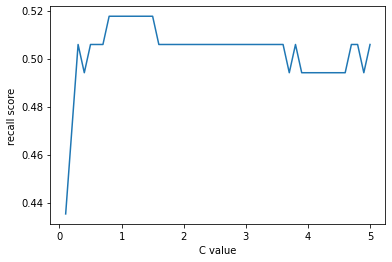

In [53]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while(C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression (C=C_val, random_state=42,solver='liblinear', max_iter=1000000)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if(recall_score > best_recall_score):
      best_recall_score = recall_score
      best_lr_predict_test = lr_predict_loop_test

    C_val = C_val + C_inc

best_score_C_val = C_values [recall_scores.index(best_recall_score)]
print("1st max  value of {0:.3f} ocurred at C= {1:3f}".format(best_recall_score, best_score_C_val))


%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

***Logistic Regression parametrization class balanced***

class_weight='balanced'

1st max  value of 0.753 ocurred at C= 0.200000


Text(0, 0.5, 'recall score')

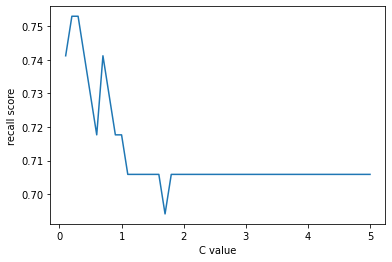

In [56]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while(C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression (C=C_val, random_state=42,solver='liblinear', class_weight='balanced' ,max_iter=1000000)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if(recall_score > best_recall_score):
      best_recall_score = recall_score
      best_lr_predict_test = lr_predict_loop_test

    C_val = C_val + C_inc

best_score_C_val = C_values [recall_scores.index(best_recall_score)]
print("1st max  value of {0:.3f} ocurred at C= {1:3f}".format(best_recall_score, best_score_C_val))


%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [0]:
lr_model = LogisticRegression(C=best_score_C_val, random_state=42, class_weight='balanced',  max_iter=1000)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

Training metrics

In [58]:
#Check Accurary
print('Accurary: {0:.4f}'.format (metrics.accuracy_score(y_test, lr_predict_test)))

Accurary: 0.7749


In [59]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
print('')
print('TN    FP')
print('FN    TP')
# TN FP
#FN  TP

Confusion Matrix
[[118  28]
 [ 24  61]]

TN    FP
FN    TP


In [60]:
print('Classification Report')
print(metrics.classification_report(y_test, lr_predict_test))

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       146
           1       0.69      0.72      0.70        85

    accuracy                           0.77       231
   macro avg       0.76      0.76      0.76       231
weighted avg       0.78      0.77      0.78       231



In [62]:
print(metrics.recall_score(y_test, lr_predict_test))

0.7176470588235294


#### **K-fold Cross Validation**
#### Logistic Regression with Cross Validation (CV)

In [84]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=True, class_weight="balanced", solver='liblinear') #set hyperparameters
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                     random_state=42, refit=True, scoring=None,
                     solver='liblinear', tol=0.0001, verbose=0)

## 7. Prediction

In [0]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

Training metrics

In [86]:
#Check Accurary
print('Accurary: {0:.4f}'.format (metrics.accuracy_score(y_test, lr_cv_predict_test)))

Accurary: 0.7749


In [87]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_cv_predict_test)))
print('')
print('TN    FP')
print('FN    TP')
# TN FP
#FN  TP

Confusion Matrix
[[118  28]
 [ 24  61]]

TN    FP
FN    TP


In [82]:
print('Classification Report')
print(metrics.classification_report(y_test, lr_cv_predict_test))

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       146
           1       0.68      0.71      0.69        85

    accuracy                           0.77       231
   macro avg       0.75      0.76      0.76       231
weighted avg       0.77      0.77      0.77       231



In [88]:
print(metrics.recall_score(y_test, lr_cv_predict_test))

0.7176470588235294
